In [1]:
%matplotlib inline
import numpy
import matplotlib
import ebl

In [2]:
allz, logednde = ebl.read_francescini_density('francescini_ednde.dat')
ne_f = lambda e,z: \
    ebl.n_epsilon_logeMdnde_functor_interp_z(e, z, allz, logednde) #, e_power=0, z_power=0)

In [3]:
ne_CMB = ebl.n_epsilon_z_bb

In [4]:
ne1 = lambda e,z: ebl.n_epsilon_sum(e, z, [ne_f, ne_CMB])

Text(0, 0.5, 'Energy density, $\\epsilon n_\\epsilon$ []')

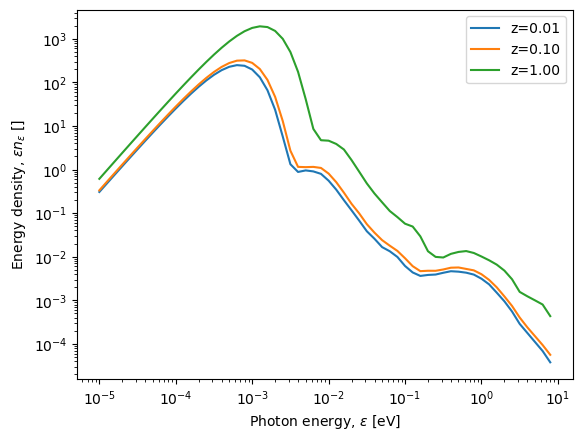

In [5]:
e = 10**numpy.arange(-5,1,0.1)
for z in [0.01, 0.1, 1.0]:
    n = [ne1(ei,z) for ei in e]
    matplotlib.pyplot.loglog(e,n*e,label=f'z={z:.2f}')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('Photon energy, $\epsilon$ [eV]')
matplotlib.pyplot.ylabel('Energy density, $\epsilon n_\epsilon$ []')

(-0.2, 5.0)

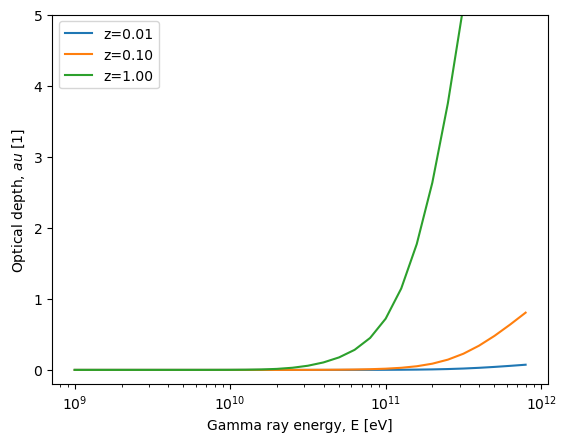

In [6]:
e = 10**numpy.arange(9,12,0.1)
for z in [0.01, 0.1, 1.0]:
    tau = [ebl.integral_zprime(z, ei, ne1) for ei in e]
    matplotlib.pyplot.semilogx(e,tau,label=f'z={z:.2f}')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('Gamma ray energy, E [eV]')
matplotlib.pyplot.ylabel('Optical depth, $\tau$ [1]')
matplotlib.pyplot.gca().set_ylim(-0.2,5)